In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
for c in Base.classes:
    print(c)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [13]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
last_measurement = session.query(Measurements).order_by(Measurements.date.desc()).first()
print(last_measurement.date)

2017-08-23


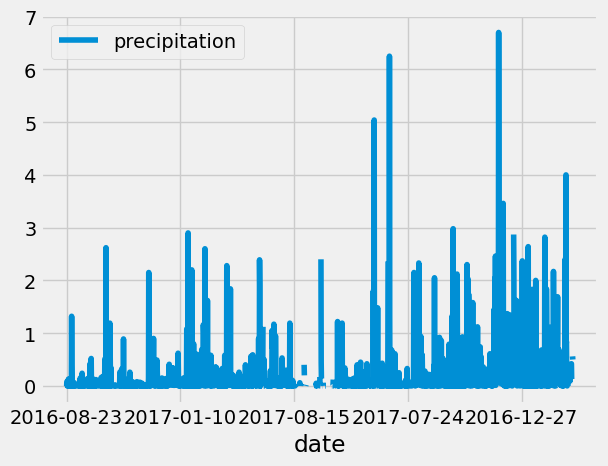

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date_str = last_measurement.date
year,month,day = str.split(last_date_str,'-')
last_date = dt.date(int(year),int(month),int(day)) 

# Calculate the date one year from the last date in data set.
first_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_by_date = (session.query(
                    Measurements.date, 
                    Measurements.prcp
                    )
                .filter(Measurements.date >= first_date)
                .filter(Measurements.date < last_date)
                .all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precip_by_date, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.line('date', 'precipitation')
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()